In [20]:
import numpy as np
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import randrange
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Exemplo de uma rede simples
**Atenção** Esta é uma arquitetura que produz resultados ruins! 

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(5, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1352)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1352)              0         
                                                                 
 dense_14 (Dense)            (None, 5)                 6765      
                                                                 
 dense_15 (Dense)            (None, 10)                60        
                                                      

In [22]:
batch_size = 128
epochs = 8
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/8
422/422 [==============================] - 6s 12ms/step - loss: 1.7860 - accuracy: 0.5337 - val_loss: 1.4149 - val_accuracy: 0.7730
Epoch 2/8
422/422 [==============================] - 5s 11ms/step - loss: 1.2778 - accuracy: 0.7610 - val_loss: 1.0549 - val_accuracy: 0.8388
Epoch 3/8
422/422 [==============================] - 5s 12ms/step - loss: 1.0092 - accuracy: 0.8095 - val_loss: 0.8341 - val_accuracy: 0.8715
Epoch 4/8
422/422 [==============================] - 5s 11ms/step - loss: 0.8345 - accuracy: 0.8391 - val_loss: 0.6786 - val_accuracy: 0.9017
Epoch 5/8
422/422 [==============================] - 5s 11ms/step - loss: 0.7107 - accuracy: 0.8622 - val_loss: 0.5694 - val_accuracy: 0.9125
Epoch 6/8
422/422 [==============================] - 5s 11ms/step - loss: 0.6199 - accuracy: 0.8769 - val_loss: 0.4843 - val_accuracy: 0.9253
Epoch 7/8
422/422 [==============================] - 5s 11ms/step - loss: 0.5537 - accuracy: 0.8823 - val_loss: 0.4233 - val_accuracy: 0.9288
Epoch 

In [23]:
def print_loss_accuracy(model):
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test accuracy:', score[1])
print_loss_accuracy(model)

Test accuracy: 0.9272000193595886


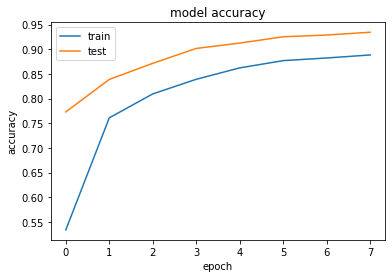

In [24]:
def plot_accuracy_convergence(history):
  # Plotando acurácia ao longo das épocas
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_accuracy_convergence(history)

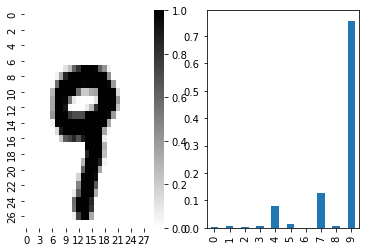

In [25]:
def give_me_some_estimative():
  ii_test = randrange(y_test.shape[0])
  plt.subplot(1, 2, 1)
  sns.heatmap(x_test[ii_test].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)
  plt.subplot(1, 2, 2)
  pd.Series(model.predict(x_test[ii_test].reshape(1, 28, 28))[0]).plot(kind = 'bar')
give_me_some_estimative()

## Exercício

Em grupos, alterar os hiperparâmetros/ arquitetura da rede, com o objetivo de aumentar a acurácia final. 

Fiquem à vontade para alterar qualquer parâmetro, como por exemplo:
- A quantidade/ tipo das layers
- O tamanho dos filtros/ camadas
- Dropout
- Batch size, epochs

**Atenção:** O modelo deve rodar em menos de 2 minutos, já considerando todas as épocas!

Ao final, cada grupo deve apresentar a acurácia final, o que foi alterado na arquitetura e o porquê.

In [26]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(5, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

batch_size = 128
epochs = 1

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print_loss_accuracy(model)

422/422 [==============================] - 5s 12ms/step - loss: 1.7450 - accuracy: 0.5102 - val_loss: 1.3846 - val_accuracy: 0.7442
Test accuracy: 0.7300000190734863
